<a href="https://colab.research.google.com/github/kameshcodes/tensorflow-codes/blob/main/8_tensorflow_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\textbf{Transfer Learning}$$

---
---

# Inception V3

---

## 1. Import Libraries

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

## 2. Download Data

$\textbf{Dataset:}$ Cat Vs Dog on Kaggle

In [2]:
!pip install -q kaggle

In [3]:
!kaggle datasets download -d kameshdubeyuuyu/cats-vs-dogs-filtered
!unzip -q cats-vs-dogs-filtered.zip -d cats-vs-dogs-filtered
!rm -rf cats-vs-dogs-filtered.zip cats-vs-dogs-filtered/vectorize.py

Dataset URL: https://www.kaggle.com/datasets/kameshdubeyuuyu/cats-vs-dogs-filtered
License(s): unknown
 98% 64.0M/65.3M [00:03<00:00, 24.1MB/s]
100% 65.3M/65.3M [00:03<00:00, 17.2MB/s]


## 3. Download Inception V3 weights

In [4]:
os.makedirs('model', exist_ok=True)

#download weights
!wget --no-check-certificate -O model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2025-02-14 23:02:22--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

model/inception_v3_ 100%[===================>]  83.84M  22.8MB/s    in 4.8s    

2025-02-14 23:02:27 (17.4 MB/s) - ‘model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



## 4. Load Inception V3 model

- load model without dense layer ie we don't include top

In [5]:
local_weights_file = "model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pre_trained_model = tf.keras.applications.InceptionV3(
    include_top = False,
    input_shape = (150, 150, 3),
    weights = None)

pre_trained_model.load_weights(local_weights_file)

In [6]:
pre_trained_model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=conv2d, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Activation name=activation, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Activation name=activation_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <Activation name=activation_2, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <BatchNormalization name=batch_normalization_3, built=True>,
 <Activation name=activation_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <BatchNormalization name=batch_normalization_4, built=True>,
 <Activation name=activation_4, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_8, built=True>,
 <BatchNormalization name=batch_normalization_8, built=True>,
 <Activation name=activation_8, built=True>,


In [7]:
pre_trained_model.layers[0].trainable

True

In [8]:
# Freeze the weights of trainable convolution layers
for layer in pre_trained_model.layers:
  layer.trainable = False

In [9]:
pre_trained_model.layers[0].trainable

False

In [10]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 74, 74, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 74, 74, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 72, 72, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 72, 72, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 72, 72, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 72, 72, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 72, 72, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 72, 72, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 35, 35, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 35, 35, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 35, 35, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 33, 33, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 33, 33, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

## 5. Get the `mixed7` layers of network

In [11]:
last_layer = pre_trained_model.get_layer('mixed7')
print('Last layer output shape:', last_layer.output.shape)
last_output = last_layer.output
last_output #gets you the op shape of output from mixed7

Last layer output shape: (None, 7, 7, 768)


<KerasTensor shape=(None, 7, 7, 768), dtype=float32, sparse=False, name=keras_tensor_228>

## 6. Add the Dense Layer

In [12]:
# flatten the op layer to 1D
x = tf.keras.layers.Flatten()(last_output)
#add a fully connected layer
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# add dropout layer with 20% dropout
x = tf.keras.layers.Dropout(0.2)(x)
# sigmoid activation
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [13]:
model = tf.keras.Model(pre_trained_model.input, x)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 74, 74, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 74, 74, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 72, 72, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 72, 72, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 72, 72, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 72, 72, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 72, 72, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 72, 72, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 35, 35, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 35, 35, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 35, 35, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 33, 33, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 33, 33, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 47,512,481 (181.25 MB)

 Trainable params: 38,537,217 (147.01 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

## 7. Prepare the dataset

In [14]:
BASE_DIR = "cats-vs-dogs-filtered"

train_dir = os.path.join(BASE_DIR, 'train')
validation_dir = os.path.join(BASE_DIR, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [15]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (150, 150),
    batch_size = 32,
    label_mode = 'binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size = (150, 150),
    batch_size = 32,
    label_mode = 'binary'
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [16]:
def preprocess_for_inception_v3(image, label):
  image = tf.keras.applications.inception_v3.preprocess_input(image)
  return image, label


train_dataset_scaled = train_dataset.map(preprocess_for_inception_v3)
validation_dataset_scaled = validation_dataset.map(preprocess_for_inception_v3)

In [17]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (validation_dataset_scaled
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

## 8. Prepare the model for training

- let's add add some `data augmentaion` to avoid the model from overfitting.

### 8.1 Create a Data augmentation layer

In [18]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2)
])

### 8.2 add the augmentation model to base model

In [19]:
inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = model(x)

model_with_aug = tf.keras.Model(inputs, x)
model_with_aug.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional (Functional)              │ (None, 1)                   │      47,512,481 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,512,481 (181.25 MB)

 Trainable params: 38,537,217 (147.01 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [20]:
model_with_aug.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

## 9. Train the model

In [21]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.95):
      print("\nReached 87% accuracy so cancelling training!")
      self.model.stop_training = True

In [22]:
history = model_with_aug.fit(
    train_dataset_final,
    epochs = 30,
    validation_data = validation_dataset_final,
    callbacks = [EarlyStoppingCallback()]
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.6284 - loss: 0.8796 - val_accuracy: 0.9350 - val_loss: 0.1505
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7714 - loss: 0.4540 - val_accuracy: 0.9460 - val_loss: 0.1236
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.8015 - loss: 0.4171 - val_accuracy: 0.9650 - val_loss: 0.0983
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8077 - loss: 0.3910 - val_accuracy: 0.9620 - val_loss: 0.1045
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.8126 - loss: 0.4059 - val_accuracy: 0.9580 - val_loss: 0.1006
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8155 - loss: 0.3879 - val_accuracy: 0.9600 - val_loss: 0.1101
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8423 - loss: 0.3516 - val_accuracy: 0.9600 - val_loss: 0.0983
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.8292 - loss: 0.3641 - val_accuracy: 0.9660 -

## 10. Evaluate the results

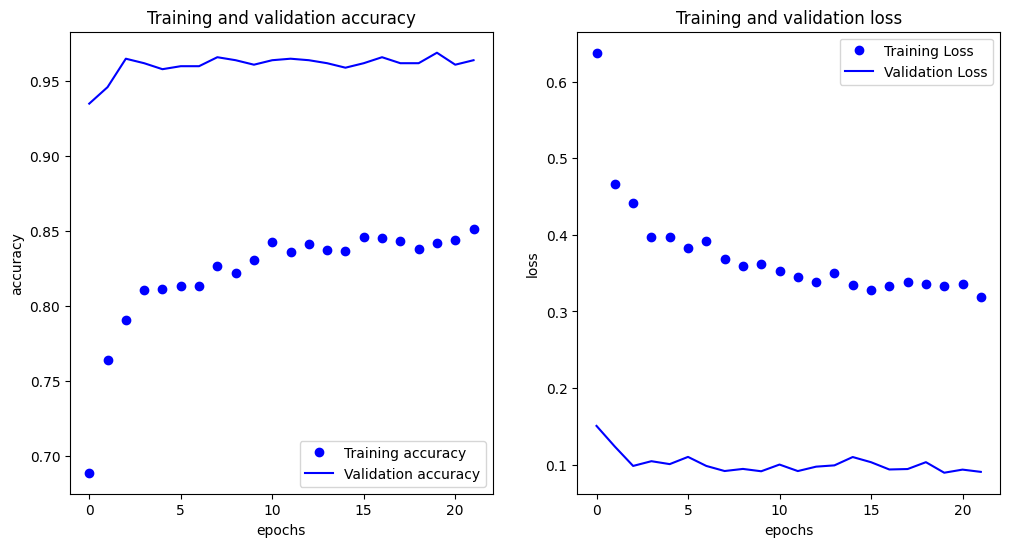

In [23]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

plot_loss_acc(history)